In [13]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def Canny(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

def region_of_interest(image):
  height = image.shape[0]
  polygons = np.array([
      [(200, height), (1100, height), (550, 250)]
  ])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, polygons, 255)
  masked_image = cv2.bitwise_and(image, mask)
  return masked_image

def display_lines(image, lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line.reshape(4)
      cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 15)
  return line_image

def average_slope_intercept(image, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    x1, y1, x2, y2 = line.reshape(4)
    parameters = np.polyfit((x1, x2), (y1, y2), 1) # <-- 1 is the degree of the polynomial fit
    slope = parameters[0]
    intercept = parameters[1]

    if slope < 0:
      left_fit.append((slope, intercept))
    else:
      right_fit.append((slope, intercept))

  left_fit_average = np.average(left_fit, axis=0)
  right_fit_average = np.average(right_fit, axis=0)
  left_line = make_coordinates(image, left_fit_average)
  right_line = make_coordinates(image, right_fit_average)
  return np.array([left_line, right_line])
  
def make_coordinates(image, line_parameters):
  slope, intercept = line_parameters
  y1 = image.shape[0]
  y2 = int(y1 * (3/5))
  x1 = int((y1 - intercept) / slope)
  x2 = int((y2 - intercept) / slope)
  return np.array([x1, y1, x2, y2])

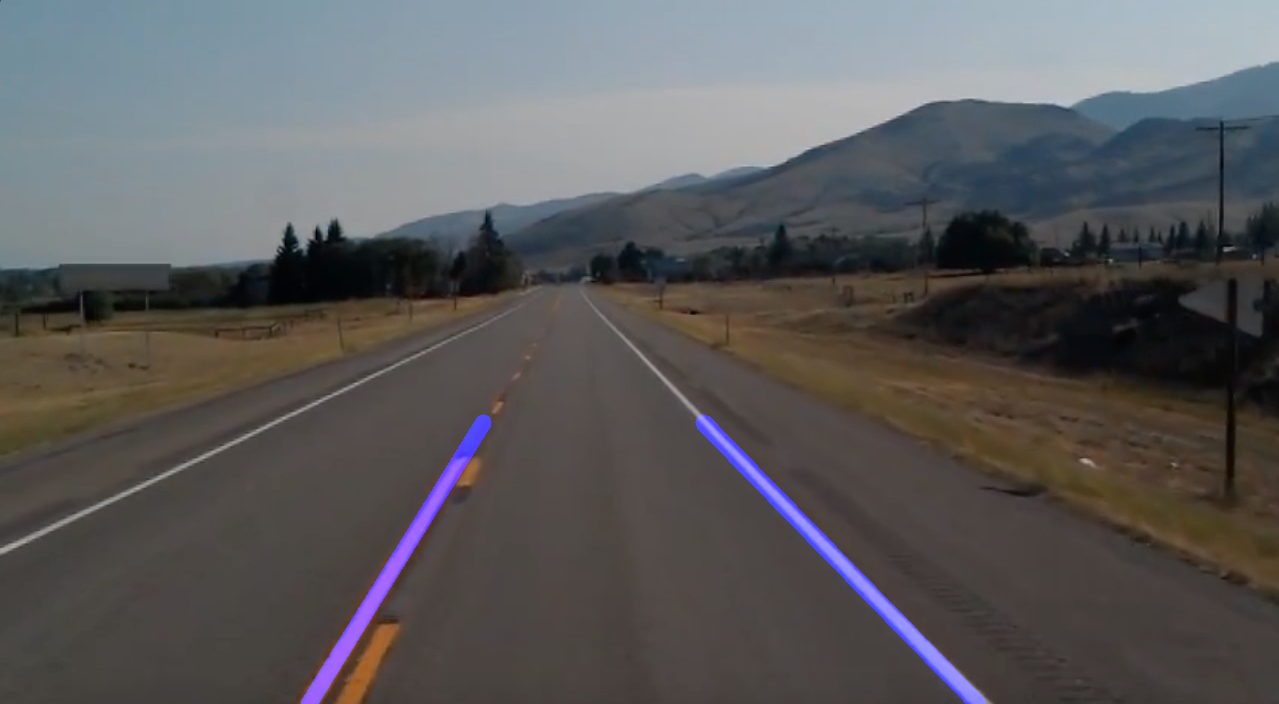

-1

In [43]:
# image = cv2.imread('test_image.jpg')
# lane_image = np.copy(image)
# canny_image = Canny(lane_image)
# cropped_image = region_of_interest(canny_image)
# lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
# averaged_lines = average_slope_intercept(lane_image, lines)
# line_image = display_lines(lane_image, averaged_lines)
# final_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
# cv2_imshow(final_image)
# cv2.waitKey(0)

In [ ]:
cap = cv2.VideoCapture('test2.mp4')
while cap.isOpened():
  _, frame = cap.read()
  canny_image = Canny(frame)
  cropped_image = region_of_interest(canny_image)
  lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
  averaged_lines = average_slope_intercept(frame, lines)
  line_image = display_lines(frame, averaged_lines)
  final_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
  cv2_imshow(final_image)
  if cv2.waitKey(1) == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()